In [2]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
trainData = pd.read_csv('../data/1e7data_train.csv', index_col=0)
testData = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4465,True,1.000000e+07,10000000.0,0.000015,0.021544,0.049234,0.010924,0.011821,2.166832,0.011453,...,0.000584,0.025326,0.000058,0.010939,0.000067,0.000212,0.000205,0.001258,0.002236,0.004439
4231,False,5.556366e+05,10000000.0,0.000015,0.021544,0.043888,0.009194,0.004916,-1.426257,0.007699,...,0.000374,0.155129,0.000066,0.002199,0.000106,0.000375,0.000007,0.034136,0.000070,0.000463
487,False,1.955824e+06,10000000.0,0.000015,0.021544,0.056372,0.013384,0.006294,-0.410190,0.003253,...,0.000039,0.023756,0.000583,0.002526,0.000630,0.003254,0.000256,0.000608,0.000759,0.000256
2210,False,4.607903e+03,10000000.0,0.000015,0.021544,0.054535,0.012735,0.007372,-1.748617,0.015612,...,0.000702,0.005107,0.000400,0.006366,0.005785,0.000889,0.000212,0.000663,0.000126,0.000314
4390,True,1.000000e+07,10000000.0,0.000015,0.021544,0.042994,0.008915,0.009054,2.988464,0.013263,...,0.000565,0.008115,0.000088,0.010731,0.000342,0.000861,0.000082,0.001282,0.000835,0.000491


In [27]:
features = ['daOvera1', 'daOvera2', 'daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['norm_std_e1', 'norm_max_e1', 'norm_std_window10_e1', 'norm_max_window10_e1']
features += ['norm_std_e2', 'norm_max_e2', 'norm_std_window10_e2', 'norm_max_window10_e2']
features += ['norm_std_e3', 'norm_max_e3', 'norm_std_window10_e3', 'norm_max_window10_e3']
features += ['avg_eH1', 'std_eH1', 'max_eH1', 'min_eH1', 'avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_eH2', 'std_eH2', 'max_eH2', 'min_eH2', 'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_eH3', 'std_eH3', 'max_eH3', 'min_eH3', 'avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_std_inc1', 'norm_max_inc1', 'norm_std_window10_inc1', 'norm_max_window10_inc1']
features += ['norm_std_inc2', 'norm_max_inc2', 'norm_std_window10_inc2', 'norm_max_window10_inc2']
features += ['norm_std_inc3', 'norm_max_inc3', 'norm_std_window10_inc3', 'norm_max_window10_inc3']
features += ['std_iH1', 'max_iH1', 'min_iH1']
features += ['std_iH2', 'max_iH2', 'min_iH2']
features += ['std_iH3', 'max_iH3', 'min_iH3']
features += ['mean_std_iH', 'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

y = df['Stable']
X = df[features]
X.head()

,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOverRH,maxdaOverRH,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,...,max_iH2,min_iH2,std_iH3,max_iH3,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope,norm_LyapunovTime
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2414,0.193670,0.150145,8.989360,6.969123,6.969123,8.989360,0.000112,0.000557,0.000091,0.000193,...,0.488761,0.007474,0.133838,0.495492,0.062506,0.163858,9.070729e-12,5.392272e-11,-5.233243e-11,2779.936244
4056,0.127645,0.109779,5.924768,5.095487,5.095487,5.924768,0.001214,0.003334,0.001208,0.001626,...,0.416561,0.014399,0.073070,0.468496,0.203063,0.112950,-7.677887e-09,2.201825e-09,6.922318e-09,197.311426
4855,0.156020,0.180944,7.241825,8.398691,7.241825,8.398691,0.000166,0.000862,0.000054,0.000086,...,0.776533,0.177455,0.157162,0.603885,0.116377,0.229787,-2.157238e-11,2.878952e-10,-2.463631e-10,1798.042109
517,0.190471,0.192685,8.840869,8.943640,8.840869,8.943640,0.000115,0.000579,0.000076,0.000190,...,0.723123,0.020936,0.186270,0.741034,0.105617,0.227344,2.259498e-10,-1.393307e-10,-6.778557e-11,1436.312951
1520,0.127295,0.109568,5.908519,5.085694,5.085694,5.908519,0.000833,0.003023,0.001136,0.001878,...,0.694574,0.086032,0.167739,0.662411,0.001271,0.196684,1.115990e-09,-5.790419e-09,5.156142e-09,151.410089


In [20]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import ipywidgets as widgets
from ipywidgets import FloatSlider, fixed
from ipywidgets.widgets.widget_selection import SelectionSlider

This function, adapted from Diana's notebook, does CV on the passed model, and prints out the optimal number of iterations for the adopted hyperparameters (`xgb.cv` will run up to `n_estimators` rounds, but if the CV score doesn't improve in `early_stopping_rounds` rounds, it will stop, and will return the sequence of CV scores with the last 50 cut out).

In [21]:
def optimize_n_estimators(model, df, features, cv_folds=5, early_stopping_rounds=50):
    # xgb.cv performs CV at each boosting iteration, and stops when CV score doesn't improve, 
    # so we can use it to set the optimal number of boosting rounds num_boost_round (n_estimators)
    xgb_param = model.get_xgb_params()
    xgtrain = xgb.DMatrix(df[features].values, label=df['Stable'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    
    testmeanauc = cvresult.tail(1).values[0,0]
    teststdauc = cvresult.tail(1).values[0,1]
    optimal_n_estimators = cvresult.index.values[-1]
    
    print("Learning Rate: {0}".format(model.learning_rate))
    print("CV score: {0} +/ {1}".format(testmeanauc, teststdauc/np.sqrt(cv_folds)))
    print("Optimal number of iterations (n_estimators) = {0}.".format(optimal_n_estimators))

The lower `n_estimators` is, the faster the models will train, so we want to pick a reasonably small value at first to optimize in the high dimensional hyperparameter space.  The lower the `learning_rate`, the more rounds (`n_estimators`) it needs to run.  `learning_rate` goes from [0,1], so let's see how many rounds we have to run at the high end of that range:

In [22]:
model = XGBClassifier(seed=27, n_estimators=10000)
learning_rates = np.linspace(0.05, 0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

Learning Rate: 0.05
CV score: 0.9451488 +/ 0.00253042038247
Optimal number of iterations (n_estimators) = 225.
Learning Rate: 0.1
CV score: 0.944988 +/ 0.00303044002086
Optimal number of iterations (n_estimators) = 255.
Learning Rate: 0.15
CV score: 0.9468246 +/ 0.0026337455701
Optimal number of iterations (n_estimators) = 343.
Learning Rate: 0.2
CV score: 0.9450378 +/ 0.00246062467516
Optimal number of iterations (n_estimators) = 75.
Learning Rate: 0.25
CV score: 0.94263 +/ 0.00320023855361
Optimal number of iterations (n_estimators) = 58.
Learning Rate: 0.3
CV score: 0.942924 +/ 0.00277193223582
Optimal number of iterations (n_estimators) = 37.
Learning Rate: 0.35
CV score: 0.9423792 +/ 0.00198042569969
Optimal number of iterations (n_estimators) = 111.
Learning Rate: 0.4
CV score: 0.9415624 +/ 0.00281555801361
Optimal number of iterations (n_estimators) = 14.
Learning Rate: 0.45
CV score: 0.942632 +/ 0.0024257719596
Optimal number of iterations (n_estimators) = 17.
Learning Rate: 0.

`learning_rate` = 0.2 does almost as well as 0.1, so let's run that one.  Let's choose a slightly higher `n_estimators` since as we vary the other parameters, 131 will no longer be the optimal value:

In [23]:
model.set_params(learning_rate=0.2, n_estimators=200)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

I next tried to optimize `max_depth` and `min_child_weight` simultaneously.  This is not what Kristen suggested, but I was playing around and seeing as this data set is so tiny, there's no computational bottleneck at all.  `max_depth` is the depth of the trees, and we only have about 20 features, so don't need to test values > 20.

Here I set the ranges for the parameters

In [7]:
Nfolds = 5
max_depth = [4, 8, 12, 18, 24]
min_child_weight = np.logspace(-1,2,5)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=Nfolds)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

I wrote some functions to help visualize the results

In [24]:
%matplotlib inline
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotgrid(grid, vmin, vmax, midpoint):
    param_grid = grid.param_grid
    
    # get the names of the parameters
    param1 = param_grid.keys()[0]
    param2 = param_grid.keys()[1]

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores
    # We extract just the scores
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint))
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[param2])), np.round(param_grid[param2], decimals=2))
    plt.yticks(np.arange(len(param_grid[param1])), np.round(param_grid[param1], decimals=2))
    plt.title('CV Score')
    plt.show()
       
def plot1dcut(grid, param_names, fixed_param_name, fixed_value_name):
    fixed_value = float(fixed_value_name)
    param_grid = grid.param_grid
    
    # Each entry x in grid.grid_scores_ has all the CV scores in x[2]
    scores = np.fabs([np.mean(x[2]) for x in grid.grid_scores_])
    stds = np.fabs([np.std(x[2]) for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    stds = np.array(stds).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    
    if fixed_param_name == param_names[0]:
        xvals = param_grid[param_names[1]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[mask,:].flatten()
        errs = stds[mask,:].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[1])

    elif fixed_param_name == param_names[1]:
        xvals = param_grid[param_names[0]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[:,mask].flatten()
        errs = stds[:,mask].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[0])

    ax.errorbar(xvals, yvals, errs)
    ax.set_ylabel('CV score')
    ax.set_title("{0} = {1}".format(fixed_param_name, fixed_value))
    plt.show()

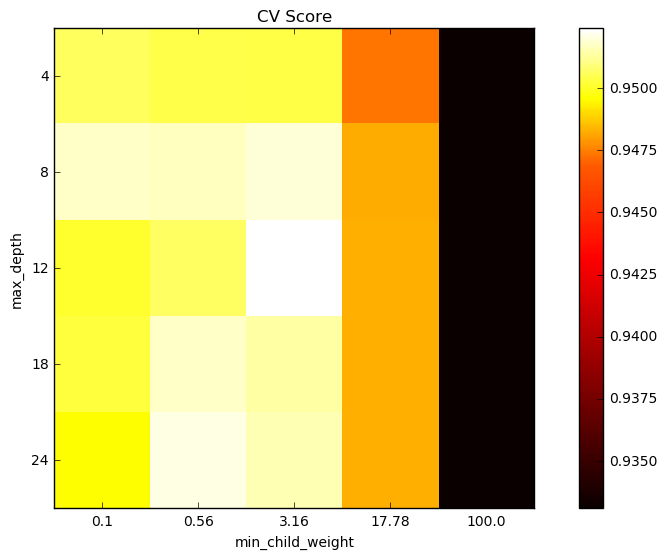

<function __main__.plotgrid>

In [9]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

The sliders allow you to change the color scales so you're not swamped by terrible scores or have trouble discerning nearby CV scores.  Here the grid is very coarse, so don't need to use it.  

Now we tighten the grid a bit:

In [25]:
max_depth = [8,9,10,11,12,13,14,15,16]
min_child_weight = np.logspace(np.log10(0.3),np.log10(10), 10)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

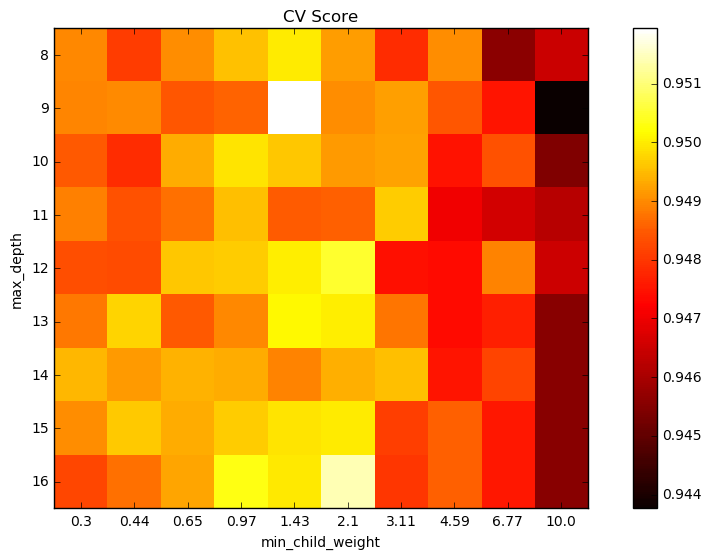

In [26]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

Here the sliders help a bit more.  Looks like `max_depth = 12`, `min_child_weight`=30 is a region with good scores.  The widgets below allow you to look at 1D cuts through the 2D plot above:

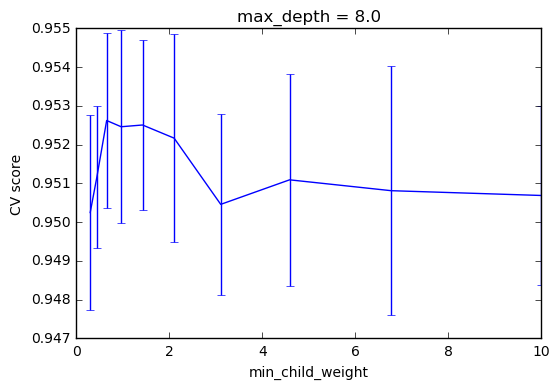

<function __main__.plot1dcut>

In [12]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

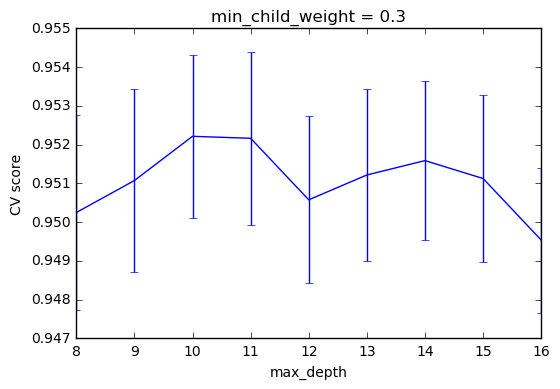

<function __main__.plot1dcut>

In [13]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

Lower values of max_depth and higher values of min_child_weight help avoid overfitting, but if you go too far the model will do badly.  So I think we want to go with more conservative values.  Here it seems like max_depth of 4 does well, which I think suggests we don't have many features that will help the algorithm!  So let's choose:

In [14]:
model.set_params(max_depth=12, min_child_weight=2.)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.15, max_delta_step=0, max_depth=12,
       min_child_weight=2.0, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [15]:
subsample = np.linspace(0.2,1,10)
colsample_bytree = np.linspace(0.8,1,6)

param_grid = dict(subsample=subsample, colsample_bytree=colsample_bytree)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

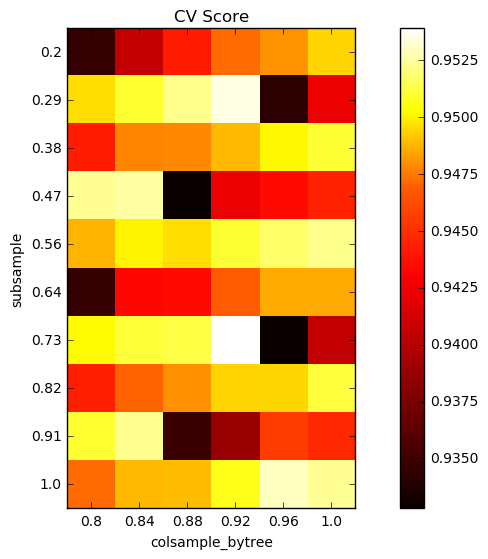

<function __main__.plotgrid>

In [16]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

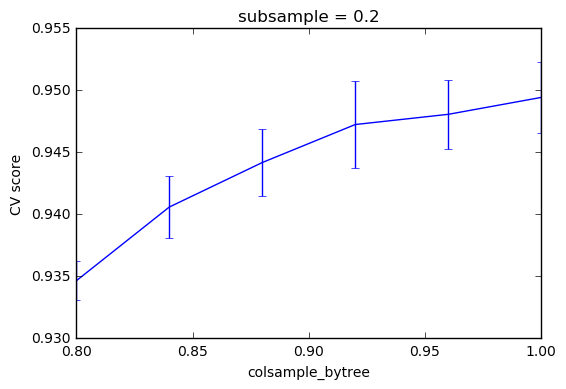

<function __main__.plot1dcut>

In [17]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

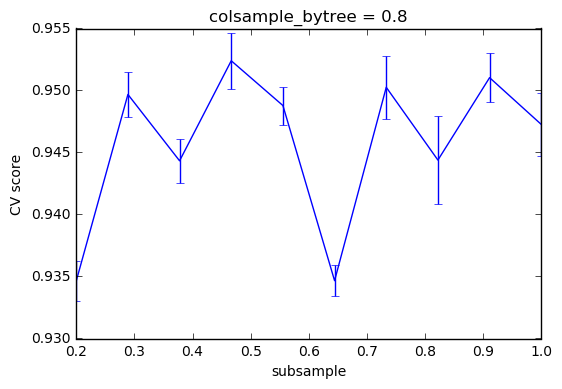

<function __main__.plot1dcut>

In [18]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

We choose the approximate maximum:

In [19]:
model.set_params(subsample=0.8, colsample_bytree=0.9)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.15, max_delta_step=0, max_depth=12,
       min_child_weight=2.0, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

Now we lower the `learning_rate` (so we have to raise `n_estimators`) to get a slightly better model:

In [20]:
model.set_params(n_estimators=10000)
learning_rates = np.logspace(-3, -0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

Learning Rate: 0.001
CV score: 0.9509496 +/ 0.00254258143783
Optimal number of iterations (n_estimators) = 4562.
Learning Rate: 0.00189573565241
CV score: 0.9435696 +/ 0.00272037690918
Optimal number of iterations (n_estimators) = 308.
Learning Rate: 0.0035938136638
CV score: 0.9515008 +/ 0.00247877291255
Optimal number of iterations (n_estimators) = 1711.
Learning Rate: 0.00681292069058
CV score: 0.9516998 +/ 0.00253896187289
Optimal number of iterations (n_estimators) = 1075.
Learning Rate: 0.0129154966501
CV score: 0.9512798 +/ 0.00270606266594
Optimal number of iterations (n_estimators) = 552.
Learning Rate: 0.0244843674682
CV score: 0.9518686 +/ 0.00246085777891
Optimal number of iterations (n_estimators) = 268.
Learning Rate: 0.0464158883361
CV score: 0.9512812 +/ 0.00270351749245
Optimal number of iterations (n_estimators) = 269.
Learning Rate: 0.0879922543569
CV score: 0.9506638 +/ 0.00267208693571
Optimal number of iterations (n_estimators) = 81.
Learning Rate: 0.16681005372
C

So this is probably close to our best model:

In [21]:
model.set_params(learning_rate=0.01, n_estimators=10000)
optimize_n_estimators(model, df, features)

Learning Rate: 0.01
CV score: 0.9513144 +/ 0.00248764345677
Optimal number of iterations (n_estimators) = 576.



Model Report
Accuracy : 0.8853
AUC Score (Test): 0.945109


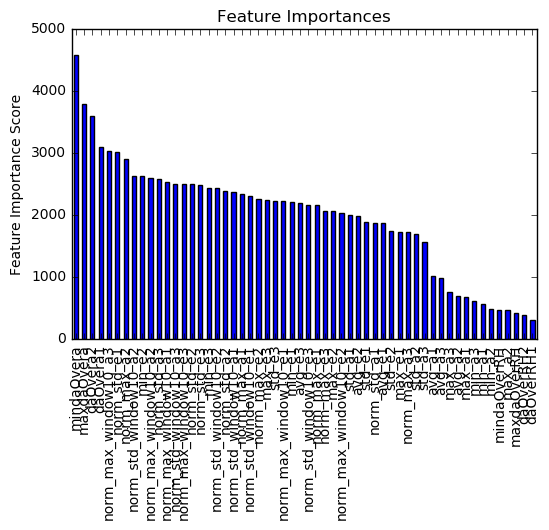

In [22]:
model.fit(df[features], df['Stable'],eval_metric='auc')
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [38]:
dftest.index.values

array([1648, 3471, 3849, ..., 1581, 3484, 1050])

In [47]:
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_std_window10_e3,norm_max_window10_e3,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.236713,0.336729,0.148209,0.153647,6.879240,7.131643,0.148209,0.153647,6.879240,7.131643
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.132747,0.201569,0.183061,0.115718,8.496936,5.371167,0.115718,0.183061,5.371167,8.496936
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.442545,0.800100,0.146990,0.125499,6.822671,5.825163,0.125499,0.146990,5.825163,6.822671
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.172514,0.314051,0.109718,0.131489,5.092680,6.103170,0.109718,0.131489,5.092680,6.103170
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.274968,0.328780,0.192353,0.111740,8.928228,5.186531,0.111740,0.192353,5.186531,8.928228


In [58]:
y_pred[(dftest['Stable'] == True) & (y_pred[:,1] < 0.02)]

/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([[ 0.34044391,  0.65955609],
       [ 0.34044391,  0.65955609],
       [ 0.34044391,  0.65955609],
       ..., 
       [ 0.34044391,  0.65955609],
       [ 0.34044391,  0.65955609],
       [ 0.34044391,  0.65955609]], dtype=float32)

In [59]:
dftest["y_pred"] = y_pred[:,1]
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_max_window10_e3,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.336729,0.148209,0.153647,6.879240,7.131643,0.148209,0.153647,6.879240,7.131643,0.659556
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.201569,0.183061,0.115718,8.496936,5.371167,0.115718,0.183061,5.371167,8.496936,0.000196
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.800100,0.146990,0.125499,6.822671,5.825163,0.125499,0.146990,5.825163,6.822671,0.000020
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.314051,0.109718,0.131489,5.092680,6.103170,0.109718,0.131489,5.092680,6.103170,0.000108
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.328780,0.192353,0.111740,8.928228,5.186531,0.111740,0.192353,5.186531,8.928228,0.004974


In [85]:
correct = dftest[(dftest['Stable'] == True) & (dftest["y_pred"] > 0.98)]

In [86]:
correct.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_max_window10_e3,daOvera1,daOvera2,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1229,True,10000000.0,10000000.0,0.000015,0.021544,0.042544,0.008775,0.002086,2.089051,0.003208,...,0.172417,0.155114,0.168592,7.199736,7.825329,0.155114,0.168592,7.199736,7.825329,0.999591
1644,True,10000000.0,10000000.0,0.000015,0.021544,0.049041,0.010860,0.000342,0.154817,0.011433,...,0.220667,0.178892,0.181204,8.303448,8.410750,0.178892,0.181204,8.303448,8.410750,0.999949
759,True,10000000.0,10000000.0,0.000015,0.021544,0.041181,0.008357,0.006286,-1.417579,0.007818,...,0.214817,0.154099,0.186978,7.152637,8.678742,0.154099,0.186978,7.152637,8.678742,0.999442
1515,True,10000000.0,10000000.0,0.000015,0.021544,0.056134,0.013299,0.010586,-0.401963,0.010905,...,0.548322,0.170625,0.134898,7.919690,6.261422,0.134898,0.170625,6.261422,7.919690,0.992231
4470,True,10000000.0,10000000.0,0.000015,0.021544,0.045170,0.009600,0.017861,0.765424,0.017440,...,0.137836,0.172645,0.168701,8.013453,7.830395,0.168701,0.172645,7.830395,8.013453,0.998643


In [82]:
misclass = dftest[(dftest['Stable'] == False) & (dftest["y_pred"] > 0.98)]
misclass.shape

(20, 103)

In [83]:
misclass["P3/P2"] = misclass["P3"]/misclass["P2"]
misclass["P3/P1"] = misclass["P3"]/misclass["P1"]
misclass["P2/P1"] = misclass["P2"]/misclass["P1"]
misclass.head()

/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH,y_pred,P3/P2,P3/P1,P2/P1
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4002,False,1.285084e+06,10000000.0,0.000015,0.021544,0.058205,0.014042,0.016157,0.160546,0.013167,...,7.773276,8.524302,0.167470,0.183651,7.773276,8.524302,0.991808,1.287751,1.624417,1.261437
1777,False,2.408925e+06,10000000.0,0.000015,0.021544,0.051765,0.011777,0.017399,0.148569,0.004282,...,8.014806,8.040536,0.172674,0.173228,8.014806,8.040536,0.986166,1.270780,1.613738,1.269880
4404,False,2.993244e+06,10000000.0,0.000015,0.021544,0.049501,0.011013,0.001038,-4.364727,0.013987,...,6.744445,8.777125,0.145305,0.189097,6.744445,8.777125,0.992742,1.296650,1.589283,1.225683
2487,False,3.973838e+06,10000000.0,0.000015,0.021544,0.059417,0.014483,0.003450,2.960035,0.011546,...,8.070393,6.993032,0.150660,0.173871,6.993032,8.070393,0.992345,1.234291,1.569802,1.271825
4680,False,9.281882e+06,10000000.0,0.000015,0.021544,0.058472,0.014139,0.003061,0.023009,0.004668,...,8.066147,6.269470,0.135072,0.173780,6.269470,8.066147,0.995856,1.209293,1.537830,1.271677


In [84]:
misclass

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,daOverRH1,daOverRH2,mindaOvera,maxdaOvera,mindaOverRH,maxdaOverRH,y_pred,P3/P2,P3/P1,P2/P1
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4002,False,1.285084e+06,10000000.0,0.000015,0.021544,0.058205,0.014042,0.016157,0.160546,0.013167,...,7.773276,8.524302,0.167470,0.183651,7.773276,8.524302,0.991808,1.287751,1.624417,1.261437
1777,False,2.408925e+06,10000000.0,0.000015,0.021544,0.051765,0.011777,0.017399,0.148569,0.004282,...,8.014806,8.040536,0.172674,0.173228,8.014806,8.040536,0.986166,1.270780,1.613738,1.269880
4404,False,2.993244e+06,10000000.0,0.000015,0.021544,0.049501,0.011013,0.001038,-4.364727,0.013987,...,6.744445,8.777125,0.145305,0.189097,6.744445,8.777125,0.992742,1.296650,1.589283,1.225683
2487,False,3.973838e+06,10000000.0,0.000015,0.021544,0.059417,0.014483,0.003450,2.960035,0.011546,...,8.070393,6.993032,0.150660,0.173871,6.993032,8.070393,0.992345,1.234291,1.569802,1.271825
4680,False,9.281882e+06,10000000.0,0.000015,0.021544,0.058472,0.014139,0.003061,0.023009,0.004668,...,8.066147,6.269470,0.135072,0.173780,6.269470,8.066147,0.995856,1.209293,1.537830,1.271677
313,False,8.667267e+06,10000000.0,0.000015,0.021544,0.051292,0.011616,0.017445,1.211552,0.002447,...,8.877333,6.706971,0.144497,0.191256,6.706971,8.877333,0.988916,1.224388,1.591928,1.300183
550,False,5.283317e+06,10000000.0,0.000015,0.021544,0.056796,0.013536,0.000781,-0.985885,0.007489,...,6.885316,7.821446,0.148340,0.168508,6.885316,7.821446,0.997525,1.263119,1.554342,1.230559
3778,False,5.157864e+06,10000000.0,0.000015,0.021544,0.048493,0.010679,0.004836,-0.509114,0.015055,...,8.255427,7.499789,0.161578,0.177858,7.499789,8.255427,0.994684,1.251899,1.600315,1.278310
2965,False,8.681913e+06,10000000.0,0.000015,0.021544,0.044157,0.009279,0.001631,4.489014,0.012428,...,8.406224,7.646402,0.164737,0.181107,7.646402,8.406224,0.995069,1.257009,1.613499,1.283602


(0, 250)

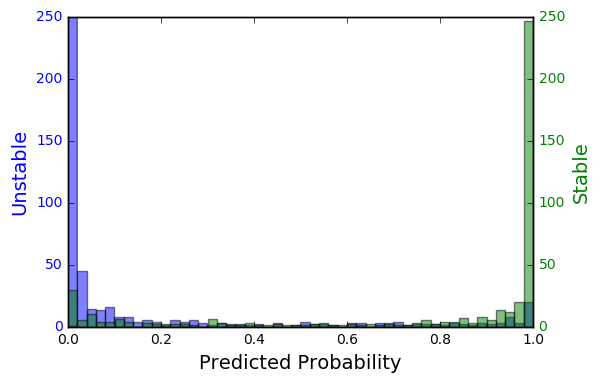

In [89]:
# Histogram:

bins = 50
y_pred=model.predict_proba(dftest[features])
Stable=y_pred[dftest['Stable'].values][:,1]
Unstable=y_pred[~dftest['Stable'].values][:,1]


#df['Predict'].loc[df['Truth']==1]

fig, ax1 = plt.subplots()
ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
ax1.set_ylim([0,250])
ax2.set_ylim([0,250])


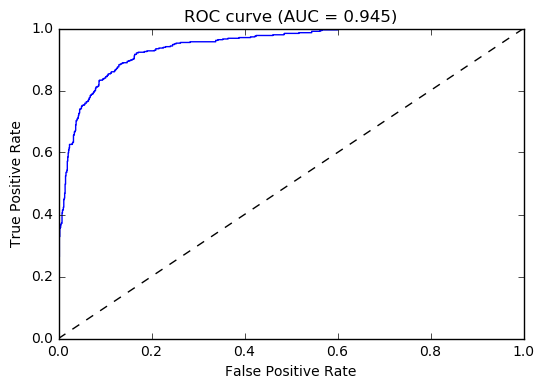

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(dftest['Stable'], dtest_predprob)))

In [25]:
for i in range(0,len(fpr), 10):
    print("Threshold {0}, FPR = {1}, TPR = {2}".format(thresholds[i], fpr[i], tpr[i]))

Threshold 0.99999332428, FPR = 0.0, TPR = 0.00225225225225
Threshold 0.99759632349, FPR = 0.00378787878788, TPR = 0.355855855856
Threshold 0.995069146156, FPR = 0.0104166666667, TPR = 0.414414414414
Threshold 0.988915801048, FPR = 0.0151515151515, TPR = 0.497747747748
Threshold 0.96691018343, FPR = 0.0208333333333, TPR = 0.585585585586
Threshold 0.938438296318, FPR = 0.030303030303, TPR = 0.628378378378
Threshold 0.896133482456, FPR = 0.0369318181818, TPR = 0.671171171171
Threshold 0.827121138573, FPR = 0.0426136363636, TPR = 0.711711711712
Threshold 0.754525661469, FPR = 0.0492424242424, TPR = 0.740990990991
Threshold 0.66250628233, FPR = 0.0596590909091, TPR = 0.759009009009
Threshold 0.548221886158, FPR = 0.0681818181818, TPR = 0.777027027027
Threshold 0.455694288015, FPR = 0.0757575757576, TPR = 0.792792792793
Threshold 0.358302175999, FPR = 0.0833333333333, TPR = 0.810810810811
Threshold 0.261702895164, FPR = 0.0956439393939, TPR = 0.835585585586
Threshold 0.198213070631, FPR = 0.

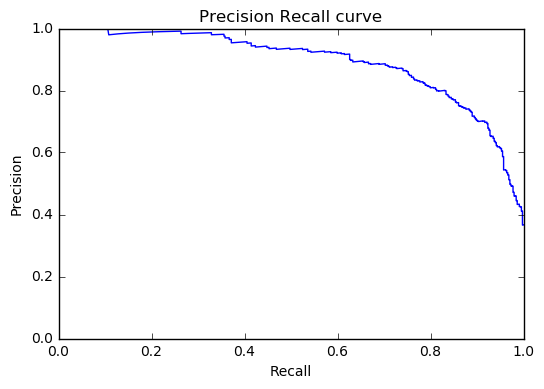

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

In [27]:
for i in range(0,len(recall), 40):
    print("Threshold {0}, Precision = {1}, Recall = {2}".format(thresholds[i], precision[i], recall[i]))

Threshold 0.000130913525936, Precision = 0.366336633663, Recall = 1.0
Threshold 0.000185044453247, Precision = 0.378309137489, Recall = 0.997747747748
Threshold 0.000250189128565, Precision = 0.39203539823, Recall = 0.997747747748
Threshold 0.000344392901752, Precision = 0.406422018349, Recall = 0.997747747748
Threshold 0.000481554452563, Precision = 0.420952380952, Recall = 0.995495495495
Threshold 0.000643479521386, Precision = 0.433663366337, Recall = 0.986486486486
Threshold 0.000913826632313, Precision = 0.450515463918, Recall = 0.984234234234
Threshold 0.001280028373, Precision = 0.467741935484, Recall = 0.97972972973
Threshold 0.00173550529871, Precision = 0.487640449438, Recall = 0.977477477477
Threshold 0.00221712584607, Precision = 0.507058823529, Recall = 0.970720720721
Threshold 0.00291426689364, Precision = 0.52962962963, Recall = 0.966216216216
Threshold 0.00403758278117, Precision = 0.551948051948, Recall = 0.957207207207
Threshold 0.00732172513381, Precision = 0.5821917

In [28]:
quant = np.arange(0.01, 1.0, 0.01)*100
prob_Stable = np.percentile(Stable,quant)

quant_f = interp1d(prob_Stable, quant)
prob_f=interp1d(quant, prob_Stable)

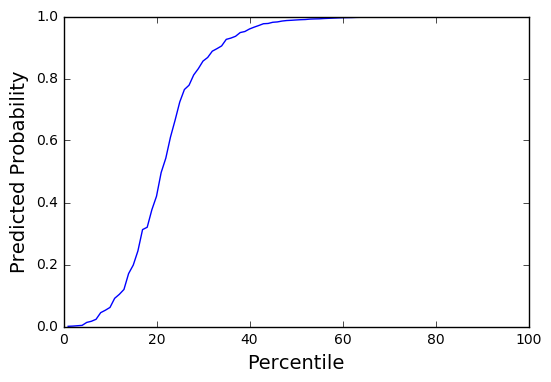

In [29]:
fig, ax = plt.subplots()
plt.plot(quant, prob_Stable)
ax.set_xlabel('Percentile', fontsize=14)
ax.set_ylabel('Predicted Probability', fontsize=14)
plt.show()

In [30]:
_tv = []
_accv = []
_accnormv = []
for i, thresh in enumerate(prob_Stable):
    _loc_yes = Stable >= thresh
    _loc_no = Unstable >= thresh
    _yes = Stable[_loc_yes].shape[0]
    _no = Unstable[_loc_no].shape[0]
    _total = _yes + _no
    if i % 5 == 0:
        print(thresh, _yes*100 / _total)
    _tv.append(thresh)
    _accv.append(_yes*100/_total)
#    _accnormv.append(_yes / Stable.shape[0] / (_yes / Stable.shape[0] + _no / Unstable.shape[0]))
_tv = np.asarray(_tv)
_accv = np.asarray(_accv)
#_accnormv = np.asarray(_accnormv)

(0.00063320830638986087, 43)
(0.016874532029032711, 63)
(0.090915353447198824, 72)
(0.24368428945541376, 78)
(0.49658925265073806, 81)
(0.76442054152488714, 87)
(0.86777651131153122, 88)
(0.93038147449493414, 89)
(0.96566321909427644, 92)
(0.9825225198268891, 92)
(0.9896728920936585, 93)
(0.99346626043319697, 94)
(0.99632866740226744, 95)
(0.997864112854004, 98)
(0.99866063714027409, 98)
(0.99928550958633422, 99)
(0.99953108429908744, 98)
(0.99970030307769775, 98)
(0.99983349442481995, 100)
(0.99994824409484862, 100)


Pred prob for 90 percent accuracy: 0.943867
Pred prob for 80 percent accuracy: 0.376499


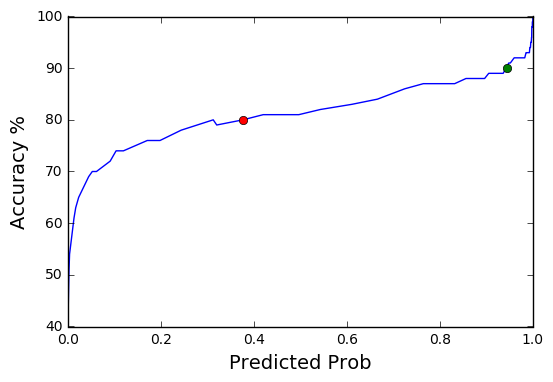

To obtain 90 percent accuracy need to go to 38 quantile
To obtain 80 percent accuracy need to go to 19 quantile


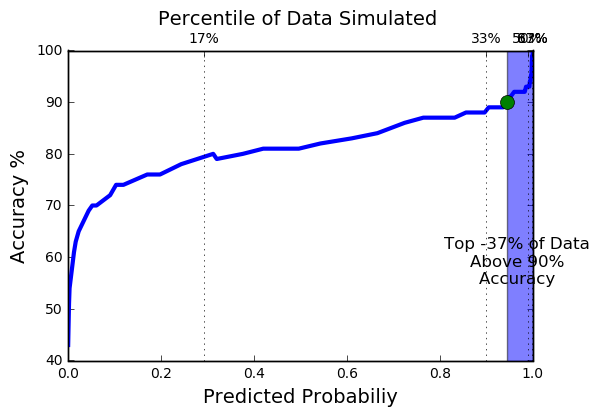

In [31]:
# Find 90% accuracy:
# calculate fit
thr_f = interp1d(_accv, _tv)

# calculate new x's and y's
thresh_fit = thr_f(_accv)
thresh_90=thr_f(90)
thresh_80=thr_f(80)

print('Pred prob for 90 percent accuracy: %f' % thresh_90)
print('Pred prob for 80 percent accuracy: %f' % thresh_80)

fig, ax1 = plt.subplots()
plt.plot(_tv, _accv , thresh_90, 90, 'o', thresh_80, 80, 'o')

ax1.set_xlabel('Predicted Prob', fontsize=14)
ax1.set_ylabel('Accuracy %', fontsize=14)
plt.show()

# calculate new x's and y's
quant_fit = quant_f(prob_Stable)
quant_acc90=quant_f(thresh_90)
quant_acc80=quant_f(thresh_80)
print('To obtain 90 percent accuracy need to go to %1.f quantile' % quant_acc90)
print('To obtain 80 percent accuracy need to go to %1.f quantile' % quant_acc80)


fig, ax1 = plt.subplots()
#plt.plot(f(_tv),_accv *100., f(thresh_90),0.9*100., 'o', markersize=10, color=orangeWCN, LineWidth=3)
ax1.plot(_tv,_accv, thresh_90, 90, 'o', markersize=10,  lw=3, zorder=60)
ax1.set_xlabel('Predicted Probabiliy', fontsize=14)

ax1.set_ylabel('Accuracy %', fontsize=14)
ay2 = ax1.twiny()

# setting grid:
#plt.grid()
xticks=prob_f(np.array([0.167, 0.333, 0.5, 0.667, 0.833])*100)
xlabels=['17%', '33%', '50%', '67%','83%']


ay2.xaxis.grid(True, which='major', zorder=50)

ay2.set_xlabel('Percentile of Data Simulated ' , fontsize=14)
ay2.set_xlim(ax1.get_xlim())
ay2.set_xticks(xticks, minor=False)
ay2.set_xticklabels(xlabels)



ax1.axvspan(thresh_90, 1, alpha=0.5, zorder=20)
legend = ax1.text((1-thresh_90)/2+thresh_90, 55, 'Top %.0f%% of Data \nAbove 90%% \nAccuracy ' %((1-quant_f(thresh_90))),
                  fontsize=12, ha='center', zorder=40)

